This file was downloaded from colab link where the code was originally shifted for collaborative/shared analysis

# Vehicle Number Plate Detection

In [ ]:
import cv2
from skimage.filters import threshold_local
import tensorflow as tf
from skimage import measure
import imutils
import matplotlib.pyplot as plt
import traceback
import copy
import numpy as np


In [ ]:
ls


 Deblurring/   Deraining/                   README.md
 demo.py       LICENSE.md                   samples/
 Denoising/    pytorch-gradual-warmup-lr/  'Screenshot (1206).png'


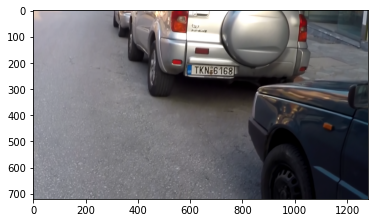

Original Image


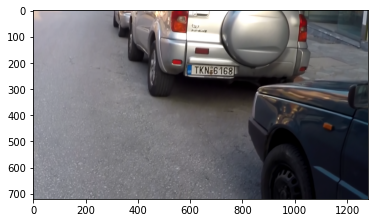

cv2.GaussianBlur(input_img, (7, 7), 0)


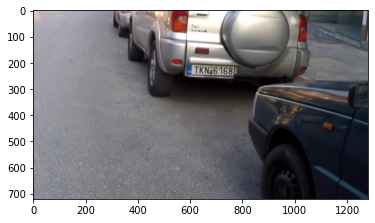

cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY) 


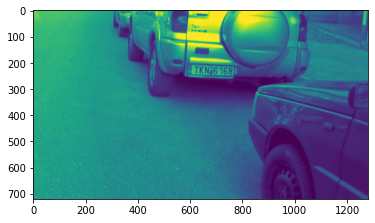

cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize = 3)  


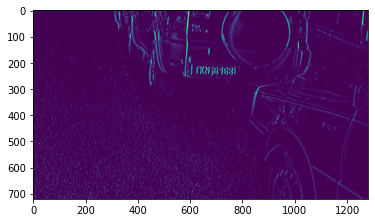

cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 


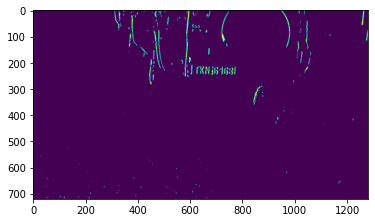

cv2.morphologyEx(src = threshold_img,
                 op = cv2.MORPH_CLOSE,
                 kernel = element,
                 dst = morph_n_thresholded_img)


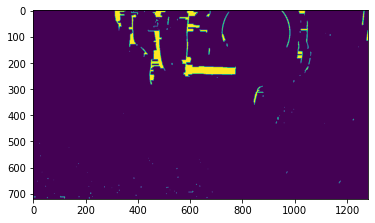

In [ ]:
# -------------Deblurred Image-------

layer1Output = "/content/drive/MyDrive/MPRNet/samples/output/000634.jpg"
img = cv2.imread(layer1Output)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.show()
# -----------------------------------

input_img = img

print("Original Image")
plt.imshow(input_img)
plt.show()

imgBlurred = cv2.GaussianBlur(input_img, (5, 5), 0)
print("cv2.GaussianBlur(input_img, (7, 7), 0)")
plt.imshow(imgBlurred)
plt.show()

# convert to gray
gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY) 
print("cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY) ")
plt.imshow(gray)
plt.show()

# sobelX to get the vertical edges
sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize = 3)  
print("cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize = 3)  ")
plt.imshow(sobelx)
plt.show()

# otsu's thresholding
ret2, threshold_img = cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
print("cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) ")
plt.imshow(threshold_img)
plt.show()

element = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize =(22, 3))

morph_n_thresholded_img = threshold_img.copy()
morphed_img = cv2.morphologyEx(src = threshold_img, 
             op = cv2.MORPH_CLOSE,
             kernel = element,
             dst = morph_n_thresholded_img)

# This offset has been used specifically for this image
# Actually the plate is taken out by going through all contours but that will make the code complicated so for now
# This plate was taken out by this offset
# In video you can clearly see that plate is actually found by the program but that requires a lot of computation
# Its like after analysis of 100+ contours 1-2 are shortlisted as possible plate candidates
xoffset = 45
yoffset =  210


print("cv2.morphologyEx(src = threshold_img,")
print("                 op = cv2.MORPH_CLOSE,")
print("                 kernel = element,")
print("                 dst = morph_n_thresholded_img)")
plt.imshow(morph_n_thresholded_img)
plt.show()

after_preprocess = threshold_img


(720, 1280)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)


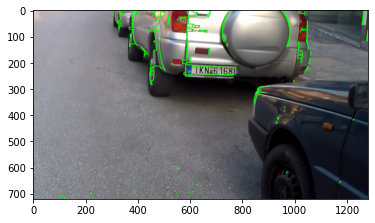

(720, 1280, 3)


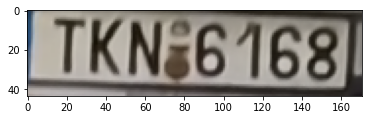

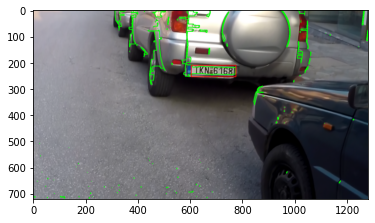

In [ ]:
# After Processing check contours:
original_image = copy.deepcopy(img)

input_img = copy.deepcopy(morph_n_thresholded_img)
print(input_img.shape)
_, contours, _ = cv2.findContours(input_img, 
                                          mode = cv2.RETR_EXTERNAL,
                                          method = cv2.CHAIN_APPROX_NONE)

# print(contours)

img_with_contours = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
print("cv2.drawContours(img, contours, -1, (0, 255, 0), 2)")
plt.imshow(img_with_contours)
plt.show()

print(img.shape)

areas = [cv2.contourArea(c) for c in contours]

# index of the largest contour in the area
# array
max_index = np.argmax(areas)  

max_cnt = contours[max_index]
max_cntArea = areas[max_index]
x, y, w, h = cv2.boundingRect(max_cnt)
rect = cv2.minAreaRect(max_cnt)


plate_img = original_image[y+yoffset:y+h,x+xoffset:x+w]
plt.imshow(plate_img)
plt.show()

cv2.rectangle(img,(x+xoffset,y+yoffset),(x+w,y+h),(255,0,0),2)
plt.imshow(img)
plt.show()


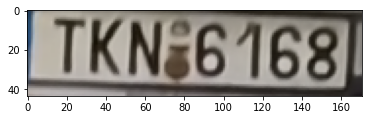

cv2.cvtColor(plate.copy(), cv2.COLOR_BGR2GRAY)


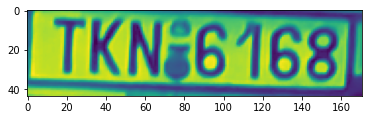

cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,1)


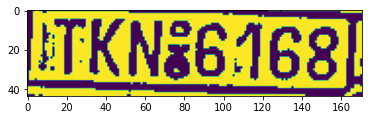

6
img_with_contours


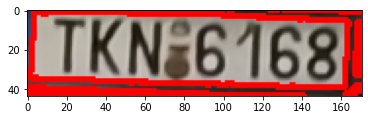

In [ ]:
# -----How contour is drawn around our plate to confirm the ratio constraints. ------
# ------From Prev Processing ---
original_plate_image = copy.deepcopy(plate_img)
plate = plate_img
plt.imshow(plate)
plt.show()

gray = cv2.cvtColor(plate.copy(), cv2.COLOR_BGR2GRAY)
_, contours, _ = cv2.findContours(gray.copy(),
                                  cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_NONE)

print("cv2.cvtColor(plate.copy(), cv2.COLOR_BGR2GRAY)")
plt.imshow(gray)
plt.show()

thresh = cv2.adaptiveThreshold(gray,
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY,
                               11,
                               1)
print("cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,1)")
plt.imshow(thresh)
plt.show()
_, contours, _ = cv2.findContours(thresh.copy(), 
                                          cv2.RETR_EXTERNAL,
                                          cv2.CHAIN_APPROX_NONE)

print(len(contours))
print("img_with_contours")
img_with_contours = cv2.drawContours(plate, contours, -1, (255, 0, 0), 2)
plt.imshow(img_with_contours,cmap='gray')
plt.show()


cv2.split(cv2.cvtColor(plate_img, cv2.COLOR_BGR2HSV))[2]


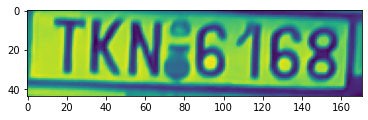

[[ 90  88  87 ... 111 111 113]
 [ 89  87  91 ...  84  82  86]
 [ 94  93 107 ...  52  55  55]
 ...
 [179 181 182 ...  40  39  38]
 [182 183 185 ...  35  34  33]
 [164 165 168 ...  28  27  26]]
thresh = cv2.adaptiveThreshold(value, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, 11, 2)


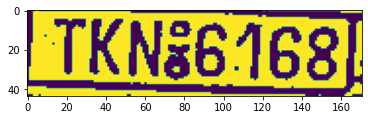

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [  0   0   0 ...   0   0   0]]
thresh = cv2.bitwise_not(thresh)


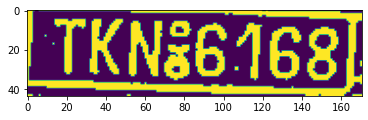

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255 255 255 ... 255 255 255]]
bgr_thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)


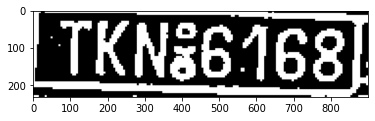

(231, 900, 3) [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
labels = measure.label(thresh, neighbors = 8, background = 0) [[   1    1    1 ...    0    0    0]
 [   1    1    1 ...    0    0    0]
 [   1    1    1 ...    0    0    0]
 ...
 [1193 1193 1193 ... 1206 1206 1206]
 [1193 1193 1193 ... 1206 1206 1206]
 [1193 1193 1193 ... 1206 1206 1206]]
aspectRatio 0.5684931506849316  solidity 0.29617098531110747  heig

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


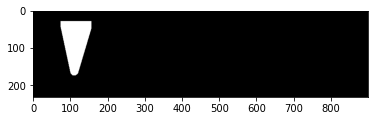

aspectRatio 0.6027397260273972  solidity 0.4324408468244085  heightRatio 0.6320346320346321  boxW 88
CharCandidates


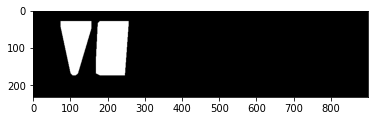

aspectRatio 0.6095890410958904  solidity 0.49118824072648914  heightRatio 0.6320346320346321  boxW 89
CharCandidates


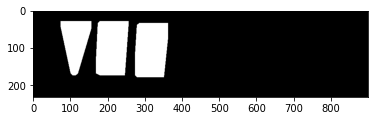

aspectRatio 0.5886524822695035  solidity 0.6146714517645048  heightRatio 0.6103896103896104  boxW 83
CharCandidates


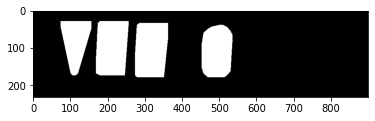

aspectRatio 0.4407894736842105  solidity 0.3401413982717989  heightRatio 0.658008658008658  boxW 67
CharCandidates


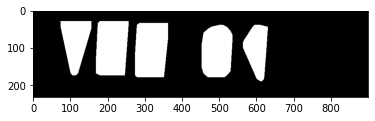

aspectRatio 0.5886524822695035  solidity 0.6087328035546441  heightRatio 0.6103896103896104  boxW 83
CharCandidates


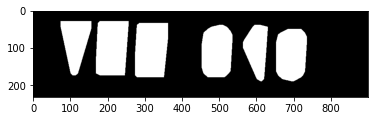

aspectRatio 0.5886524822695035  solidity 0.7329744509954712  heightRatio 0.6103896103896104  boxW 83
CharCandidates


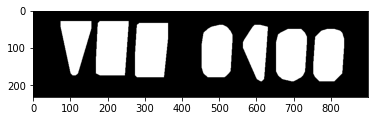

aspectRatio 0.7127659574468085  solidity 0.7117338837726263  heightRatio 0.4069264069264069  boxW 67
CharCandidates


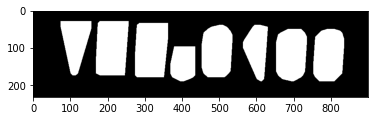

70 23 83 146
temp (154, 91, 3)


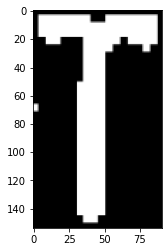

165 23 88 146
temp (154, 96, 3)


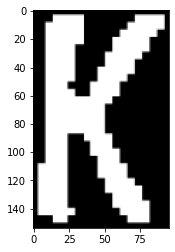

270 28 89 146
temp (154, 97, 3)


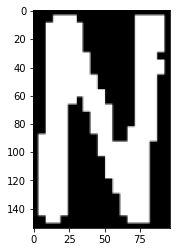

365 91 67 94
temp (102, 75, 3)


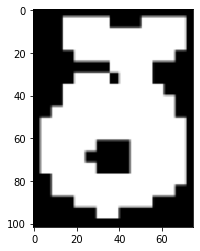

449 33 83 141
temp (149, 91, 3)


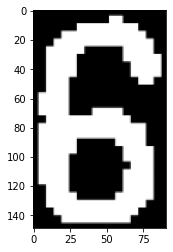

560 33 67 152
temp (160, 75, 3)


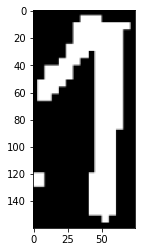

649 44 83 141
temp (149, 91, 3)


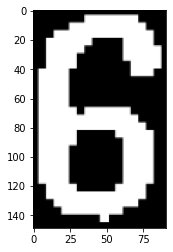

749 44 83 141
temp (149, 91, 3)


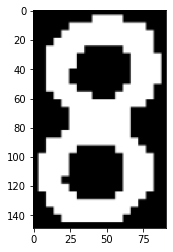

8


In [ ]:
# ----------- Finding number of characters in the Possible Plate----------

# https://www.pyimagesearch.com/2015/04/20/sorting-contours-using-python-and-opencv/
def sort_cont(character_contours):
    """
    To sort contours
    """
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in character_contours]
      
    (character_contours, boundingBoxes) = zip(*sorted(zip(character_contours,boundingBoxes),
                                                          key = lambda b: b[1][i],
                                                          reverse = False))
    return character_contours

# --------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------

plate_img = plate

# ------From Prev Processing---------
plate_img = original_plate_image
# -----------------------------------

fixed_width=900

value = cv2.split(cv2.cvtColor(plate_img, cv2.COLOR_BGR2HSV))[2]
print("cv2.split(cv2.cvtColor(plate_img, cv2.COLOR_BGR2HSV))[2]")
plt.imshow(value)
plt.show()
print(value)


thresh = cv2.adaptiveThreshold(value, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 
                               11, 2)

print("thresh = cv2.adaptiveThreshold(value, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,","\n"
"                                     cv2.THRESH_BINARY, 11, 2)")
plt.imshow(thresh)
plt.show()
print(thresh)

thresh = cv2.bitwise_not(thresh)
print("thresh = cv2.bitwise_not(thresh)")
plt.imshow(thresh)
plt.show()
print(thresh)


# resize the license plate region to
# a canoncial size
plate_img = imutils.resize(plate_img, width = fixed_width)
thresh = imutils.resize(thresh, width = fixed_width)
bgr_thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

print("bgr_thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)")
plt.imshow(bgr_thresh)
plt.show()
print(bgr_thresh.shape,bgr_thresh)

# perform a connected components analysis 
# and initialize the mask to store the locations
# of the character candidates
labels = measure.label(thresh, neighbors = 8, background = 0)

print("labels = measure.label(thresh, neighbors = 8, background = 0)",labels)

charCandidates = np.zeros(thresh.shape, dtype ='uint8')

# loop over the unique components
characters = []
for label in np.unique(labels):

    # if this is the background label, ignore it
    if label == 0:
        continue
    # otherwise, construct the label mask to display
    # only connected components for the current label,
    # then find contours in the label mask
    labelMask = np.zeros(thresh.shape, dtype ='uint8')
    labelMask[labels == label] = 255

    cnts = cv2.findContours(labelMask, 
                 cv2.RETR_EXTERNAL, 
                 cv2.CHAIN_APPROX_SIMPLE)

    cnts = cnts[0] if imutils.is_cv2() else cnts[1]

    # ensure at least one contour was found in the mask
    if len(cnts) > 0:

        # grab the largest contour which corresponds 
        # to the component in the mask, then grab the
        # bounding box for the contour
        c = max(cnts, key = cv2.contourArea)
        (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)

        # compute the aspect ratio, solodity, and 
        # height ration for the component
        aspectRatio = boxW / float(boxH)                     # char will have W < H so this can be used as W/H should be < 1 
        solidity = cv2.contourArea(c) / float(boxW * boxH)   # obviously the char will be fluffy i.e will have good enough area so compare the char area with plate area
        heightRatio = boxH / float(plate_img.shape[0])       # make sure the height of char is comparable to plate height

        # determine if the aspect ratio, solidity, 
        # and height of the contour pass the rules
        # tests
        keepAspectRatio = aspectRatio < 1.0
        keepSolidity = solidity > 0.15
        keepHeight = heightRatio > 0.5 and heightRatio < 0.95

# ---------------------------------------------------------
        keepAspectRatio = aspectRatio < 0.9
        keepSolidity = solidity > 0.1
        keepHeight = heightRatio > 0.4 and heightRatio < 0.99
# ----------------------------------------------------------
        
        # check to see if the component passes
        # all the tests
        if keepAspectRatio and keepSolidity and keepHeight and boxW > 14:

            # compute the convex hull of the contour
            # and draw it on the character candidates
            # mask
            hull = cv2.convexHull(c)
            
            cv2.drawContours(charCandidates, [hull], -1, 255, -1)
            print("aspectRatio",aspectRatio," solidity",solidity," heightRatio",heightRatio," boxW",boxW)
            print("CharCandidates")
            plt.imshow(charCandidates,cmap='gray')
            plt.show()
            
_, contours, hier = cv2.findContours(charCandidates,
                                     cv2.RETR_EXTERNAL,
                                     cv2.CHAIN_APPROX_SIMPLE)

if contours:
    contours = sort_cont(contours)

    # value to be added to each dimension 
    # of the character
    addPixel = 4  
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if y > addPixel:
            y = y - addPixel
        else:
            y = 0
        if x > addPixel:
            x = x - addPixel
        else:
            x = 0
            
        print(x,y,w,h)
        temp = bgr_thresh[y:y + h + (addPixel * 2),
                          x:x + w + (addPixel * 2)]
        
        print("temp",temp.shape)
        plt.imshow(temp,cmap='gray')
        plt.show()
        characters.append(temp)
    
    print(len(characters))
#     return characters

else:
    print("None")
#     return None